# Bike Sharing Demand

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

(이 쥬피터 노트북은 다음의 링크 https://bit.ly/ds-bike-0101 에서 다운받을 수 있습니다.)

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

저번 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 이번에도 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 머신러닝&인공지능 라이브러리인 싸이킷런([scikit-learn](scikit-learn.org))을 사용합니다. 여기에 더불어, 이번에는 데이터 시각화 패키지 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)을 본격적으로 활용해볼 것입니다.

## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [91]:
# 파이썬의 데이터 분석 패키지 Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd

## Load Dataset

언제나처럼 모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 활용하여 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/bike-sharing-demand/data))

앞서 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 여기에서도 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [92]:
train = pd.read_csv("downloads/bike_sharing/train.csv")

print(train.shape)
train.head()

##season : 1은 봄 2는 여름 3은 가을 4는 겨울
##holiday : 공휴일 (토요일 일요일과는 다른 개념) , workingday : 근무일
##weather : 1은 맑음 2는 구름 조금 3은 비가 스물스물 4는 천둥번개
##atemp : 체감온도
## humidity : 습도 , windspeed : 풍속
## casual : 비회원 대여 , registered : 회원 대여
## 우리가 맞춰야하는 것은 count

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [93]:
test = pd.read_csv("downloads/bike_sharing/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

데이터를 읽어왔으면, 이 데이터를 편하게 분석하고 머신러닝 알고리즘에 집어넣기 위해 간단한 전처리(Preprocessing) 작업을 진행하겠습니다.

[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)는 편리하게도 대부분의 데이터가 전처리 되어있습니다. (가령 season 컬럼은 봄을 spring이라 표현하지 않고 1이라고 표현합니다) 그러므로 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와는 달리 간단한 전처리만 끝내면 바로 머신러닝 모델에 데이터를 집어넣을 수 있습니다.

### Parse datetime

먼저 **날짜(datetime)** 컬럼을 전처리 하겠습니다.

날짜 컬럼은 얼핏 보면 여러개의 숫자로 구성되어 있습니다. (ex: 2011-01-01 00:00:00) 하지만 결론적으로 숫자는 아니며, 판다스에서는 문자열(object) 또는 날짜(datetime64)로 인식합니다. (값에 하이픈(-)과 콜론(:)이 있기 때문입니다) 그러므로 날짜(datetime) 컬럼을 사용하기 위해서는 머신러닝 알고리즘이 이해할 수 있는 방식으로 전처리를 해줘야 합니다.

날짜(datetime) 컬럼을 전처리하는 가장 쉬운 방법은 연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초라고 볼 수 있으므로, 2011, 1, 1, 0, 0, 0으로 따로 나누면 총 6개의 숫자가 됩니다. 즉, **날짜(datetime) 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 날짜 컬럼을 전처리하는 핵심입니다**.

In [94]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second



train[["datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [95]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
## 개수 안맞아도 에러가 안나는 버그가 있으니 항상 체크!


test[["datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


In [96]:
### 탐험적데이터 분석해야하는 이유

### 탐험적데이터 분석이란? 이론화 되어있지않음
### 전문성을 갖추면 좋음, 아이디에이션이 중요함! 도메인지식이 중요함!

### Tip

In [97]:
# 탐험적 데이터분석 또는 처음 다룰 때 2~7일정도는 예측모델를 계속 만들고 제출하지 않는다.
# why? 점수오르면 땡큐 그러나 왜 올랐는지 왜 떨어졌는지 모름!
# 머신러닝 모델ㅇ르 먼저 만들지 말라
# 데이터 분석부터 해라! 데이터를 완벽하게 이해를 할 때까지
## 데이터 분석은 끈기있게 볼것!

In [98]:
## 창의적인 아이디어를 내는것은 전제로 하지않음
## 효율성을 추구할 때 창의적인 아이디어를 구상하지않음
## 캐글대회에서는 Kernels와 Discussion 을 참고해서 벤치마킹부터
## 그리고 비슷한 대회를 찾아서 적용

In [99]:
## 지금은 창의적인 아이디어가 중요한게 아니라
## 유사 데이터 유사 대회를 벤치마킹!

In [100]:
## 캐글 경진대회를 많이 참여해라!
## 타이타닉에서 사용한 것을 바이크쉐어링에 적극적으로 적용해라

## Explore

전처리(Preprocesing)를 끝냈으면 그 다음에는 데이터를 분석해보겠습니다.

주어진 데이터를 시각화나 분석 툴을 통해 다양한 관점에서 이해하는 과정을 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))이라고 합니다. 저번 타이타닉 문제와 마찬가지로, 이번에도 파이썬의 데이터 시각화 패키지인 ([matplotlib](https://matplotlib.org))와 [seaborn](https://seaborn.pydata.org/) 을 활용해서 분석해보겠습니다.

In [101]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

### datetime

먼저 분석할 컬럼은 **날짜(datetime)** 컬럼입니다. 날짜 컬럼은 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회의 핵심 컬럼이라고 볼 수 있으며, 이번 경진대회에서 상위 성적을 올리고 싶다면 날짜 컬럼을 완벽하게 이해하는 것이 무엇보다도 중요합니다.

먼저 연/월/일/시/분/초에 따른 자전거 대여량을 시각화 해보겠습니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 자전거 대여량을 판가름하는데 별 영향이 없을 것 같습니다. 가령 현재 시간이 37분이면 자전거를 대여하고, 43분이면 자전거를 대여하지 않는 행동을 하지는 않을 것입니다. 그러므로 countplot으로 시각화를 해보면, 마치 [Uniform Distribution](https://m.blog.naver.com/running_p/90179231685)과 같은 모양이 나올 것 같습니다.

1. 그리고 일(```Dates-day```)도 비슷합니다. 하지만 일(```Dates-day```)은 분과 초와는 다르게, 1) 2월에는 28일 이후가 존재하지 않기 때문에, 29, 30, 31일은 다른 날보다 데이터가 적을 수도 있습니다. (예외적으로 2012년은 2월 29일이 있습니다), 비슷하게 2) 31일의 경우에는 다른 날에 비해 데이터가 절반밖에 되지 않을 것입니다. 하지만 우리는 데이터의 갯수보다는 날짜별 자전거의 평균 대여량이 중요하기 때문에, 실제 분석에는 큰 영향을 미치지 않을 것으로 예상합니다.

1. 이런 사항 외에도, 사람의 행동 패턴 상으로 날짜나 시간이라는 개념이 자전거를 대여하는데 중요한 영향을 미칠 것 같습니다. 가령 1) 시간(hour)을 기준으로 새벽보다는 오후에 사람들이 자전거를 많이 빌릴것이며, 2) 월(month)을 기준으로 추운 여름보다는 따뜻한 봄이나 가을, 내지는 더운 여름이 더 많이 빌릴 것 같습니다.



자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

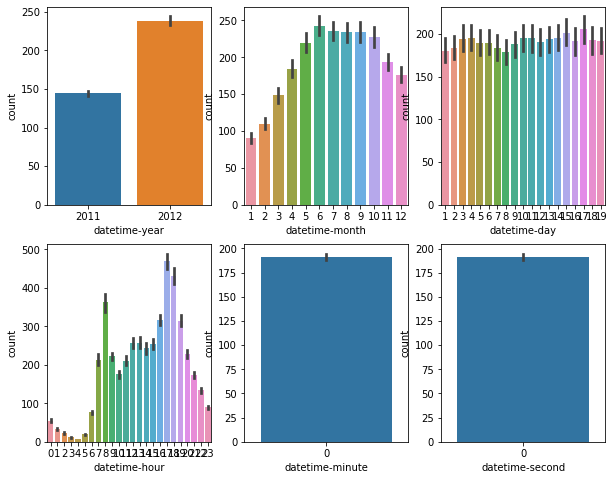

In [102]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(10,8)
sns.barplot(data=train, x="datetime-year", y="count",ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count",ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count",ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count",ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count",ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count",ax=ax6)

### Q1-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**datetime-year**
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높습니다. 이는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회를 주최한 [Capital Bikeshare](https://www.capitalbikeshare.com/)사가 꾸준히 성장하고 있다고 간주할 수 있습니다.

**datetime-month**
  * 주로 여름(6~8월)에 자전거를 많이 빌리며, 겨울(12~2월)에는 자전거를 많이 빌리지 않습니다.
  * 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높아 보입니다. 하지만 여기에는 숨겨진 비밀이 있는데, 다음에 나올 다른 시각화에서 자세히 살펴보겠습니다.
  
**datetime-day**
  * x축을 자세히 보면 1일부터 19일까지밖에 없습니다. 20일은 어디에 있을까요? 바로 test 데이터에 있습니다. 이 시각화에서 알 수 있는 내용은, train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 바로 ```datetime-day```라는 것입니다. 그러므로 21일 이후의 자전거 대여량에 대해서는 우리도 알 수 없고, 머신러닝 알고리즘도 알지 못할 것입니다.

**datetime-hour**
  * 새벽 시간에는 사람들이 자전거를 빌리지 않으며, 오후 시간에 상대적으로 자전거를 많이 빌립니다.
  * 특이하게도 두 부분에서 사람들이 자전거를 특별히 많이 빌리는 현상이 있습니다. 바로 출근 시간(7~9시)과 퇴근 시간(16시~19시) 입니다.
  * 물론 출퇴근시간이 아닌 다른 시간대에 자전거를 빌리는 경우도 존재합니다. 이는 다음에 나올 다른 시각화에서 자세히 살펴보겠습니다.

**datetime-minute** & **datetime-second**
  * 이 두 컬럼은 x축이 모두 0으로 되어있습니다. 즉, **datetime-minute**과 **datetime-second**은 기록되고 있지 않다는 사실을 알 수 있습니다.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Q1-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 먼저 분(```datetime-minute```)과 초(```datetime-second```)는 기록되지 않기 때문에 굳이 사용할 필요가 없을 것 같습니다. 차후에 머신러닝 알고리즘에 적용할 때, 이 부분은 feature에서 제거해도 될 것 같습니다.
2. 앞서 설명한대로, train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 바로 일(```datetime-day```) 컬럼입니다. 이런 경우 **datetime-day**를 feature로 집어넣으면 머신러닝 알고리즘이 과적합([overfitting](https://hyperdot.wordpress.com/2017/02/06/%EA%B3%BC%EC%A0%81%ED%95%A9overfitting/)) 되는 현상이 일어날 수 있습니다. 그러므로 train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 있으면, 이 컬럼은 feature로 사용하지 않는 것이 좋을 것 같습니다.
3. 이외에도 시(```datetime-hour```)컬럼을 보면 출퇴근시간에 사람들이 자전거를 많이 빌린다는 사실을 알 수 있습니다. 그렇다면, 만일 머신러닝 알고리즘이 출퇴근시간이라는 개념을 이해하지 못한다고 하면 이를 별도의 feature로 넣어주면 성능 향상을 꾀할 수 있을 듯 합니다. (다만 아쉽게도, ```workingday```라는 컬럼이 이 역할을 대신하고 있을 것입니다)

### weather 컬럼 분석

그 다음 분석하고 싶은 컬럼은 날씨를 나타내는 ```weather``` 컬럼입니다. 이 컬럼을 다음의 값을 가지며, 구체적인 설명은 다음과 같습니다.

  * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
  * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
  * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
  * 4: 아주 많은 비가 오거나 우박이 내립니다.

이 데이터를 엑셀 분석, 내지는 시각화하여 weather에 따라 자전거 대여량이 어떻게 변하는지 살펴보도록 하겠습니다.



### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 일단 당연하지만 안 좋은 날씨일수록 자전거 대여량이 낮아질 것 같습니다. 1(깨끗한 날씨)의 경우보다 4(아주 많은 비나 우박이 오는 날씨)인 경우에 자전거를 덜 빌릴 것입니다.
2. 그리고 값이 숫자(1, 2, 3, 4)로 되어있지만, 실제로는 수의 높고 낮은 관계가 존재하지 않을 것입니다. (이를 전문용어로 연속형(continuous) 데이터 vs 범주형(categorical) 데이터라고 합니다) 그러므로 보이는 것과는 다르게, 실제로는 범주형(categorical) 데이터로 처리해야 할 것입니다.
3. 아주 심하진 않겠지만, 날씨마다의 편차가 있을 것입니다. 가령 어떤 날은 날씨가 좋아도 안 빌리고, 어떤 날은 날씨가 안 좋아도 많이 빌릴 수도 있습니다.

이번에도 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

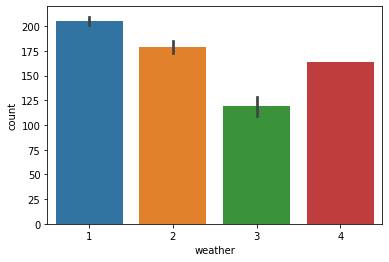

In [103]:
sns.barplot(data=train,x="weather", y="count")

## 검은색 bar는 신뢰구간
## 시각화와 엑셀보는걸 두가지 다해볼것
## 시각화는 전반적 액셀은 디테일함

### Q2-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 앞서 생각한대로 날씨(```weather```)가 안 좋을수록 자전거 대여량이 낮아지는 현상을 발견할 수 있었습니다. 즉, 날씨(```weather```)값이 3보다 2가, 2보다 1이 더 자전거를 많이 빌리는 현상이 보입니다.
2. 하지만 굉장히 특이하게도 날씨가 4인 경우, 즉 아주 많은 비가 오거나 우박이 내리는 경우에 자전거를 많이 빌리는 현상이 보입니다. 심지어는 날씨가 2인 경우(약간의 안개나 구름)에 못지 않게 자전거를 많이 빌리는 사실을 알 수 있습니다.
3. 그리고 시각화에서 신뢰 구간(confidence interval)을 상징하는 검은색 세로 선이 날씨가 4인 경우에는 보이지 않습니다. 추측컨데 날씨가 4인 경우에는 일반적인 분포와는 다소 다른 현상이 일어나고 있다고 판단할 수 있습니다.

### Q2-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 날씨(```weather```) 컬럼값이 1 ~ 3인 것만 봤을 때, 이 컬럼을 머신러닝 알고리즘에 feature로 넣으면 우리가 별도의 룰을 설정해주지 않아도 머신러닝 알고리즘이 알아서 날씨(```weather```)에 따른 자전거 대여량의 변화량을 예측할 수 있을 것 같습니다. 아마도 날씨가 좋을 수록(1에 가까울수록) 자전거를 많이 빌리고, 안 좋을수록(3에 가까울수록) 자전거를 덜 빌릴 것 같습니다.
2. 날씨 컬럼값이 4인 경우 2012년 1월 9일 하루 뿐이며 그 때 몰려서 대여를 했습니다. 따라서 이 부분을 고려하여 Feature 에 적용하면 날씨가 안좋을 수록 자전거를 덜 빌린다고 볼 수 있습니다. 또한 신뢰 구간이 안보이는 것도 같은 근거입니다.
3. 1월 9일 전후로 날씨가 좋지 않아도 회원(casual) 들의 자전거 대여량이 많습니다. 따라서 특정 기간에 몰려서 대여가 많은 부분(특히 회원)을 고려할 필요가 있다고 봅니다. 예를 들면 특정 기간에 대회나 동호회가 있을 수 있다? 정도

### windspeed 컬럼 분석

그 다음 분석하고 싶은 컬럼은 날씨를 나타내는 풍속을 나타내는 ```windspeed``` 컬럼입니다. 이 컬럼은 0에서 56까지의 값을 가집니다. 이 데이터도 시각화 해보도록 하겠습니다.

### Q3-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

1. 이 데이터는 연속형(continuous) 자료이므로 분포를 시각화하면 전형적인 [정규 분포](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%EB%B6%84%ED%8F%AC)가 나올 것입니다.
2. 하지만 이 데이터는 현실 세계의 데이터이기 때문에, 이론처럼 완벽한 정규 분포가 나오지는 않을 것입니다. 아마도 추측컨데 1) 몇몇 아웃라이어가 존재하거나, 2) 바람이 특별하게 많이 불어서 분포의 오른쪽이 길게 늘어지는 현상이 생길 것 같습니다.
3. 그리고 추측컨데 바람이 너무 많이 불면 사람들이 자전거를 덜 빌릴 것으로 예상합니다.

위 예상과 실제 데이터가 일치하는지 다시 한 번 살펴보도록 하겠습니다.

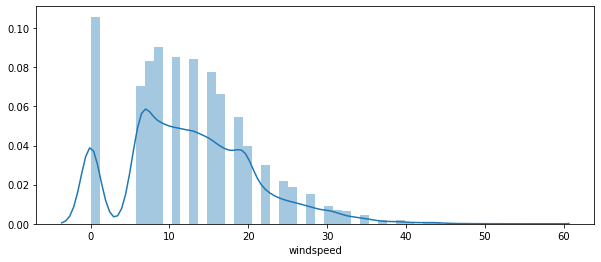

In [104]:
plt.figure(figsize=(10,4))

sns.distplot(train["windspeed"])

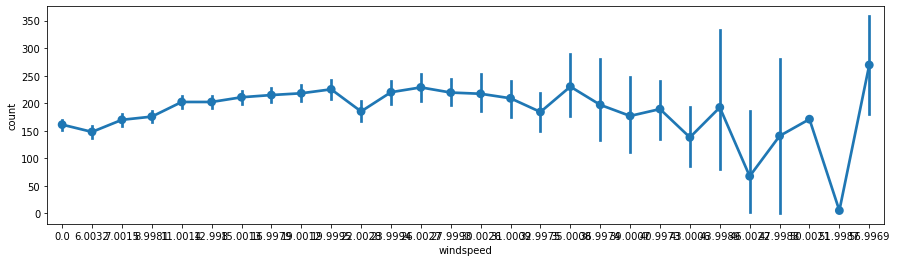

In [105]:
plt.figure(figsize=(15,4))

sns.pointplot(data=train,x="windspeed", y="count")

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 분포는 전반적으로 정규 분포가 나오지만, 1) 값이 연속적(continuous)이지 않고 듬성듬성 떨어져 있습니다. 즉, 이 데이터는 연속형(continuous) 데이터가 아닌 범주형(categorical) 데이터에 가까워 보입니다.
2. 더 특이한건, 풍속이 0인 경우가 굉장히 많으며, 정규 분포가 이상하게 보일 정도로 비중이 높습니다.
3. 또한 풍속이 과하게 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같은데, 이는 전반적으로 모수가 부족한 듯 하여 신뢰도가 높지 않습니다. 다만 풍속이 낮을 경우에 전반적으로 자전거 대여량이 낮은 현상이 보입니다. (이는 우리가 예상하지 못한 현상입니다)

### Q3-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 이 풍속(windspeed) 데이터를 머신러닝 알고리즘에 집어넣으면 머신러닝 알고리즘의 풍속에 따른 자전거 대여량의 변화를 스스로 판단할 수 있을 것 같습니다. 더 정확히는, 풍속이 낮거나 높을수록 자전거를 덜 빌리고, 풍속이 적당할 때 자전거를 더 많이 빌린다는 사실을 알 수 있습니다.
2. 풍속이 0인 경우가 많다는 것은 풍속을 측정하는 기계가 특정 역치를 넘기지 않으면 0으로 기록하는 경우로 생각할 수 도 있습니다. 즉, 바람이 0인 경우 자전거를 빌려서 타는데 체감하지 못하는 풍속의 경우는 0으로 표시했다고 추론할 수 있습니다. 따라서 0으로 표시된 부분과 그렇지 않은 부분으로 구분을 하면 의미있는 데이터를 도출할 수 있을거라 봅니다.
3. 모수가 적어서 신뢰도가 높지 않은 것은 풍속이 낮은경우보다 높은경우가 더 적다고 볼 수 있습니다. 따라서 풍속을 범위화해서 컬럼을 추가한다면 의미있는 데이터를 도출할 수 있을거라 봅니다. 

4. 따라서 1,2,3을 종합하면 풍속을 3부분의 컬럼으로 나누어 추가하면 예측 모델을 개선할 수 있을거라 봅니다.

### temp

이번에 분석할 데이터는 온도(```temp```) 컬럼입니다. 여기서부터는 제가 직접 하지 않고, 여러분들을 위한 과제로 제공하겠습니다. 앞서 컬럼들을 분석했던 것 처럼, 온도(```temp```) 컬럼도 직접 분석해보세요. 

힌트: 온도(```temp```) 컬럼만으로 좋은 분석 결과가 나오지 않는다면, 체감온도(```atemp```)를 포함한 다른 컬럼을 활용하여 시각화해보세요. 시각화는 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)이나 [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)을 사용하면 직관적인 시각화를 할 수 있을 것입니다. (단 ```scatterplot```은 seaborn의 버전이 낮으면 실행되지 않으니 이 점 주의해주세요. 이 경우는 버전을 업그레이드 한 뒤 사용하시면 됩니다)

### Q4-1) 온도(```temp```) 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?
주의: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 온도가 너무 낮으면 춥기 때문에 자전거 대여량이 낮을거라고 예상해 볼 수 있습니다. 또한 온도가 높은 경우에도 마찬가지 입니다. 
2. 이 데이터도 마찬가지로 연속형 데이터로 정규분포의 형태를 나타낼거라고 봅니다.
3. 현실 데이터는 아웃라이어가 존재할 수 있기에 (한파, 폭염 등등) 옆으로 길쭉한 형태가 나타날 거라고 봅니다.

### temp 컬럼 시각화하기

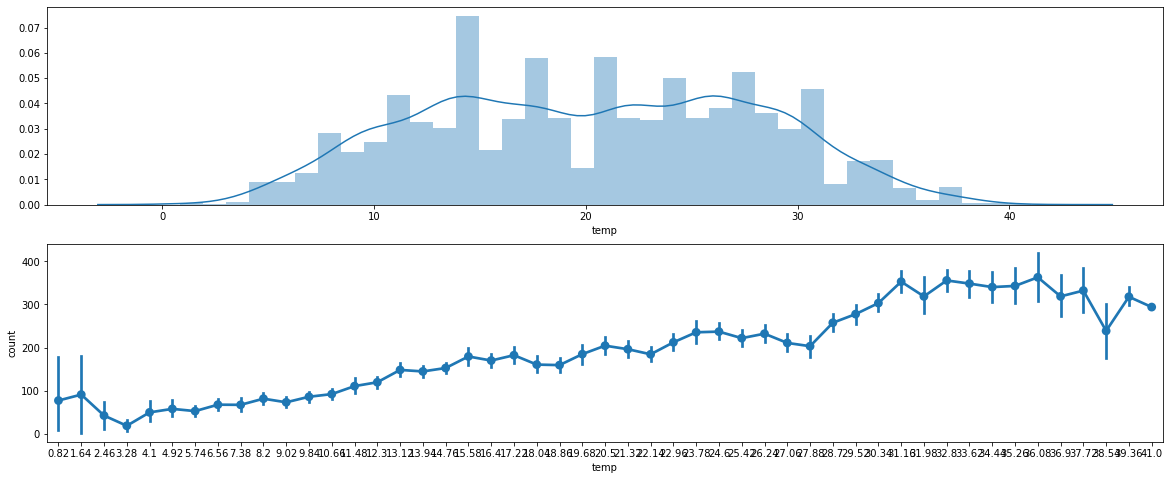

In [106]:
figure, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,8)

sns.distplot(train["temp"],ax=ax1)
sns.pointplot(data=train,x="temp",y="count",ax=ax2)
#sns.lmplot(data=train,x="temp",y="atemp",hue="count",fit_reg=False)

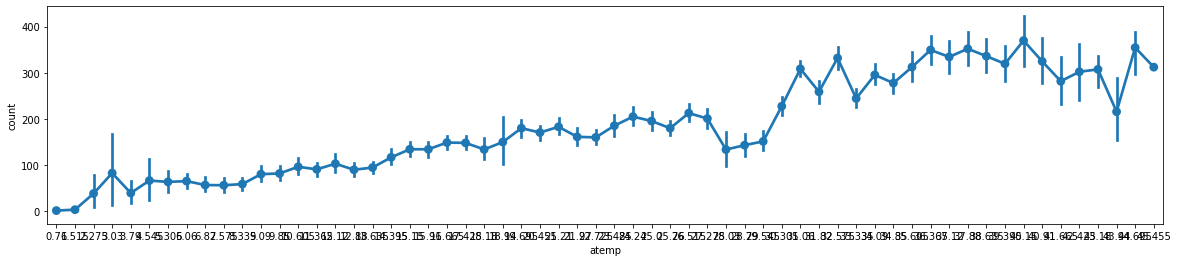

In [107]:
plt.figure(figsize=(20,4))
sns.pointplot(data=train,x="atemp",y="count")

### Q4-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 온도가 낮은 경우는 대체적으로 대여량이 낮은 것을 확인 했지만 온도가 올라갈수록 오히려 대여량이 증가한다는 사실입니다.
2. 정규분포 형태가 나타났는데 오히려 10~30도 구간이 고르게 나타났습니다.
3. 온도가 매우 높거나 낮은 경우는 모수가 작아 count와의 관계에서 신뢰구간이 크게 나타났습니다. 또한 온도가 너무 낮은 경우에 오히려 대여량이 많이 나타났습니다.
4. 예측하지 못한 상황으로는 시각화 결과에서 온도가 높았지만 체감온도는 그대로인 상황이 존재하였습니다. 또한 체감온도와 대여량의 경향도 전체적으로 온도와 대여량의 관계와 비슷한 경향을 보이고 있습니다.

### Q4-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.
1. 온도 데이터를 넣으면 온도가 높아질수록 대여량이 증가한다는 사실을 알 수 있습니다.
2. 온도와 체감온도는 count와의 관계가 비슷한 경향을 보이지만 온도와 체감온도 관계에서 아웃라이어(체감온도 약 10도)가 나타납니다. 따라서 온도가 아닌 체감온도를 Feature에 넣어주면 개선될 것이라고 봅니다.
3. 체감온도가 저온 또는 고온에서는 모수가 적어 신뢰도가 낮습니다. 따라서 이 부분을 카테고리화 시켜주면 예측 모델을 개선시킬수 있다고 봅니다.

## 나머지 데이터를 시각화를 통해 더 분석하기

지금까지 분석한 결과 외에도 다양한 방식으로 데이터를 분석하거나 시각화하여 데이터를 더 깊게 이해할려는 시도를 할 수 있습니다. 아직 우리는 분석하지 않은 다양한 데이터(```season```, ```holiday```, ```workingday```, ```humidity```, etc)가 있으며, 이 데이터에서 우리가 기존에 발견하지 못한 (내지는 머신러닝도 스스로 발견하지 못하는) 힌트를 발견할 수 있습니다.

몇몇 힌트를 드리자면

  * 체감 온도(```atemp```)라는게 구체적으로 어떤 개념인지 한 번 고민해보세요. 체감온도를 측정하기 위해서 자전거를 대여하는 사람의 몸에다가 일일이 센서를 붙일 수 없습니다. 분명 다른 방식으로 체감 온도를 측정하거나 계산하고 있을 것입니다.
  * 또한 비슷하게, 비회원(```casual```)과 회원(```registered```)이 어떤 의미인지 한 번 고민해보세요. 일반적으로 자전거 대여량을 측정할 때 이렇게 디테일하게 측정하지 않을 것입니다. (=분명 다른 이유가 있기 때문에 이런 방식으로 측정할 것 같습니다)
  * 그리고 위 컬럼이 아닌, 완전 새로운 개념에 해당하는 컬럼을 추가한 뒤 이를 feature로 사용하는 것도 가능합니다. 가령 1) 날짜 데이터를 갖고 있다면 우리는 요일(dayofweek) 정보를 뽑아낼 수 있고, 2) 온도(```temp```)와 습도(```humidity```)를 알고 있다면 우리는 불쾌지수(discomfort index)를 계산할 수 있습니다. 이러한 정보들을 머신러닝 알고리즘에 적용하면 머신러닝이 새로운 정보를 알 수 있을 것입니다.
  * 다만 데이터를 분석하거나 시각화 할 때, 처음에는 label(맞춰야 하는 정답)을 기준으로 분석하는 것이 효율적이라는 점을 유의해주세요. 시각화를 할 때도 x, y, hue 중에 가능한 한 축을 ```count```컬럼으로 놓고 분석하는 것이 유리합니다.
  * 그리고 비슷한 이유로, 다른 모든 컬럼보다 ```count```컬럼을 완벽하게 분석하고 이해하는 것이 중요합니다. ```count```의 전반적인 분포와 최소/최대치, 그리고 ```casual```과 ```registered```의 관계 등을 집중적으로 분석해주세요.
  
  
위의 힌트, 또는 본인이 생각하기에 중요하다고 생각되는 부분을 분석해보세요. 주어진 형식에 구애받지 않고 자유롭게 데이터를 분석하면 됩니다. 하지만 분석에 과정에서 몇몇 도움이 되는 노하우를 공유하자면

  * 위의 힌트를 포함한 대부분은 구글에서 검색하면 쉽게 찾을 수 있습니다. 가령 1) 체감 온도(```atemp```)의 개념과 이를 측정 또는 계산하는 방식, 2) 판다스(Pandas)를 활용해 날짜 데이터에서 요일(dayofweek) 정보를 뽑는 법 등등. 대부분의 노하우들은 인터넷에 이미 존재합니다. 이를 빠르게 검색해서 내 코드에 적용하는 것도 데이터 사이언티스트들의 중요한 소양이자 실력입니다.
  * 정보를 얻을 때, 창의성도 중요하지만 유사 솔루션, 경진대회, 데이터셋을 벤치마킹하는 실력도 매우 중요합니다. 캐글에서는 보통 [Kernel](https://www.kaggle.com/c/bike-sharing-demand/kernels) 탭에서 사람들이 본인들만의 분석 결과와 솔루션을 올리고, [Discussion](https://www.kaggle.com/c/bike-sharing-demand/discussion) 탭에서 경진대회에 대한 토론을 합니다. 이 탭을 집중적으로 살펴보고 벤치마킹 해주세요. 심지어 [이런](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/notebook) 페이지에는 경진대회 상위 10%에 도달하는 노하우가 그대로 공유되어 있습니다. 이 노하우만 잘 이해해도 충분합니다.
  * 그리고 비슷하게, [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회의 다양한 솔루션들을 구글에서 찾을 수도 있습니다. [다음의 링크](https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/)나 [다음의 링크](https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-1-c816ea9c51e1)처럼 이 경진대회에 대해 자세히 분석하고 솔루션을 제시하는 곳도 있습니다. 이런 솔루션을 구글에서 찾아서 적극적으로 벤치마킹 해주세요.
  * 마지막으로, 데이터는 많이 분석하면 분석할수록 노하우가 쌓입니다. 그리고 캐글 경진대회도 많이 참여할수록 점점 노하우가 쌓이게 됩니다. 그런 의미에서, 이전에 참여한 경진대회에서 먹혔던 분석 노하우가 전략을 적극적으로 활용해보세요. 가령 [Titanic](https://www.kaggle.com/c/titanic) 경진대회에서 먹혔던 전략을 그대로 활용하는 것도 가능합니다.
  

### Season 분석

계절분석하기

1. 날씨가 좋은 봄, 가을에는 많이 대여하고 여름, 겨울에는 많이 안탈것이다.
2. 여름, 겨울 중 겨울에 특히 더 안탈 것이다. 눈이 내리면 자전거자체를 못타지만 여름에는 비가와도 탈 수 는 있기 때문이다.
3. season의 숫자 크기는 큰 관련성은 없어보인다.

### 계절 시각화

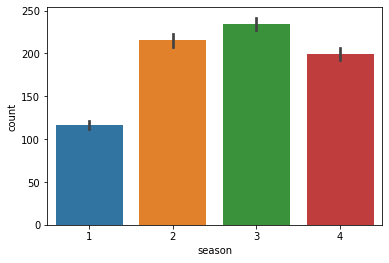

In [108]:
sns.barplot(data=train, x="season", y="count")

### 시각화 결과

season으로는 계절을 구분하기 어려웠기에 season은 봄,여름,가을, 겨울로 접근하는 것은 옳지 않다.
하지만 1~3월에 비해 나머지 기간에 대여량이 증가했다는 점은 눈여겨 볼 필요가 있다.

### 재예측

1. season을 재분배 해보자. 내가 아는 상식은  봄은 3-5, 여름은 6-8 가을은 9-11 겨울은 12-2 즉 계절에 맞게 분석해보자

### 전처리

In [109]:
train.loc[(train["datetime-month"] == 3) |(train["datetime-month"]== 4) | (train["datetime-month"] == 5),"season(humanized)"]= 1
train.loc[(train["datetime-month"] == 6) |(train["datetime-month"]== 7) | (train["datetime-month"] == 8),"season(humanized)"]= 2
train.loc[(train["datetime-month"] == 9) |(train["datetime-month"]== 10) | (train["datetime-month"] == 11),"season(humanized)"]= 3
train.loc[(train["datetime-month"] == 12) |(train["datetime-month"]== 1) | (train["datetime-month"] == 2),"season(humanized)"]= 4

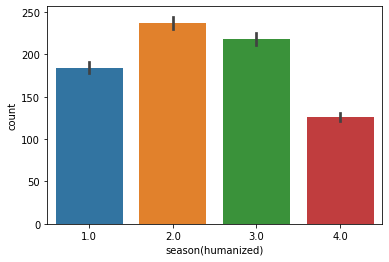

In [110]:
sns.barplot(data=train, x="season(humanized)", y="count")

### 재분석 결과

1. 겨울에 대여량이 적은 것은 맞지만 전처리 전 분류가 더 의미가 있었다.
2. 1-3월 보다는 4-12월에 대여량이 의미있게 차이가 있다는 것을 알 수 있다.

### 예측모델 향상 법

1. season은 1보다는 2,3,4에서 대여량이 높다는 것을 알 수 있으니 이것을 Feature화 시키면 도움이 될 것이다.
2. 위에서 month와 count 시각화를 비교했을 때 1,2월에 비해 3월은 1.5배정도 대여량이 증가했다 이 점을 고려하는 것도 좋을 듯 하다.
3. season과 날씨는 상관관계가 높다고 볼 수 있기에 고려해볼 만 하다. (여름에는 비가 많이오고, 겨울에는 눈이 많이오고 바람도 많이분다 등등)

### 공휴일 분석

#### 시각화 전 분석하기
1. 공휴일은 토,일요일과 다르다. 따라서 근무일과의 관계를 고려하면 토, 일요일의 유무도 알 수 있다. 즉, 토, 일요일도 같은 공휴일로 보자!
2. 공휴일에는 외출도 많기에 대체적으로 대여량이 많을 것이다.
3. 공휴일 날씨도 매우 중요한 요인이다. 날씨 좋으면 많이 대여하고 아니면 대여 안한다

### 시각화

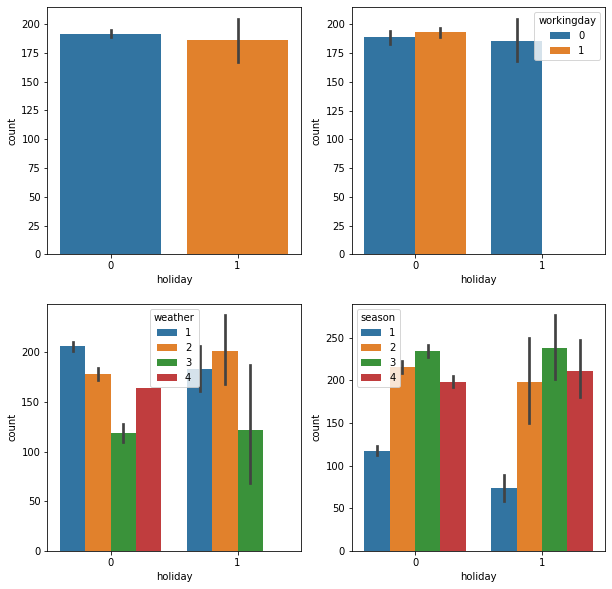

In [111]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(10,10)
sns.barplot(data=train, x="holiday", y="count",ax=ax1)
sns.barplot(data=train, x="holiday", y="count",hue="workingday",ax=ax2)
sns.barplot(data=train, x="holiday", y="count", hue="weather",ax=ax3)
sns.barplot(data=train, x="holiday", y="count", hue="season",ax=ax4)

### 결과

1. 공휴일과 휴일, 근무일 유무는 크게 의미가 없었다.
2. 따라서 다른 예측도 큰 의미가 없다
3. 따라서 다른 요인인 시간과 의 관계를 볼 필요가 있다.

### 재예측

1. 근무일과 다르게 토,일,공휴일에는 시간대별 대여량이 달라질 것이다.

### 재시각화

In [125]:
train_restday = train[train["workingday"] == 0]
train_working = train[train["workingday"] == 1]

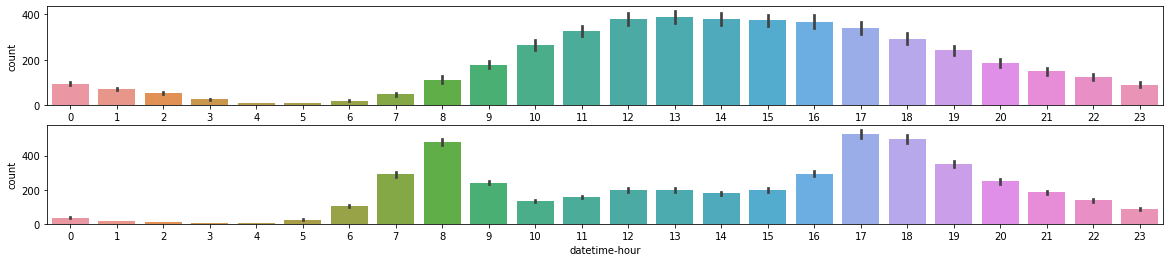

In [126]:
figure, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)

figure.set_size_inches(20,4)

sns.barplot(data=train_restday, x="datetime-hour", y="count", ax=ax1)
sns.barplot(data=train_working, x="datetime-hour", y="count", ax=ax2)

### 재분석

1. 근무일에는 출퇴근시간에만 대여량이 많지만 휴일(공휴일+토,일) 에는 출퇴근 시간 사이 대여량이 늘어났다.

### 예측 모델 향상

1. Feature 에 공휴일+토,일요일 과 근무일을 구분하는 컬럼을 추가하여 시간대별 대여량 관계를 머신러닝에 학습시키면 효과가 있다고 본다.

### 습도 분석

1. 습도가 높으면 불쾌지수도 높고 비가 올 확률도 높아서 자전거를 안탈 것이다.
2. 습도는 연속적인 데이터이므로 정규분포가 나올것이다.
3. 현실에서는 아웃라이어가 존재할 수 있으므로 넓게 퍼진 형태일 가능성도 있다.

### 시각화

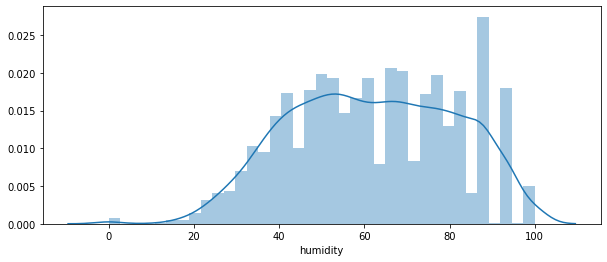

In [114]:
plt.figure(figsize=(10,4))

sns.distplot(train["humidity"])

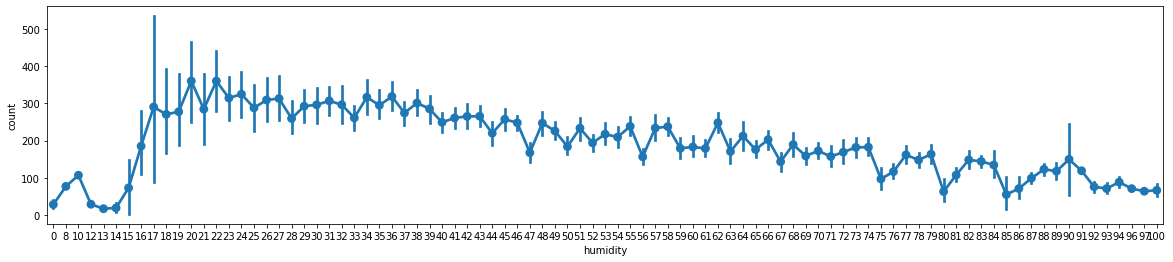

In [115]:
plt.figure(figsize=(20,4))

sns.pointplot(data=train, x="humidity", y="count")

### 시각화 분석

1. 습도가 높을수록 낮아지는 것처럼 보이지만 0~15구간에서 오히려 대여량이 확 줄었음을 알 수 있다.
2. 전반적으로 정규분포를 따른다
3. 0~20구간은 고르게 나타난다.

### 개선방향

1. 0~15구간의 경우 대여량이 거의 없고 15이후부터 습도가 증가함에따라 대여량이 줄어든다는 사실을 feature를 적용하면 향상을 도모할 수 있을 듯 합니다.
2. 자료를 자세히 살펴보면 2011/3/10 일 습도는 0으로 기록되어 있는데 날씨는 3으로 비가 오는 것으로 되어있는 것으로 봐서 습도가 잘못 기록되어 있을 수 있다고 판단됩니다. 이 부분을 조정해 줄 필요가 있습니다.

### 불쾌지수를 만들어 봅시다.

1. 불쾌지수가 높으면 자전거 대여량이 낮아질 것이다.
2. 불쾌지수 = 기온-0.55*(1-상대습도)*(기온-14.5)
3. 지수범위 68미만이면 낮음(쾌적)
4. 지수범위 68~75 - 보통(50%정도 불쾌감)
5. 지수범위 75~80 - 높음(불쾌감을 나타내기 시작함)
6. 지수범위 80이상 - 매우높음(전원 불쾌감을 느낌)

In [116]:
train["discomfort_index"] = train["temp"]-0.55*(1-0.01*train["humidity"])*(train["temp"]-14.5)

In [117]:
train["discomfort_index"]

0        10.32697
1         9.62280
2         9.62280
3        10.48075
4        10.48075
           ...   
10881    15.28300
10882    14.69851
10883    14.06012
10884    14.06012
10885    13.37806
Name: discomfort_index, Length: 10886, dtype: float64

In [118]:
train.loc[train["discomfort_index"]<21,"discomfort_index(humanized)"]="1"
train.loc[(train["discomfort_index"]>=21)&(train["discomfort_index"]<24),"discomfort_index(humanized)"]="2"
train.loc[(train["discomfort_index"]>=24)&(train["discomfort_index"]<27),"discomfort_index(humanized)"]="3"
train.loc[(train["discomfort_index"]>=27)&(train["discomfort_index"]<29),"discomfort_index(humanized)"]="4"
train.loc[(train["discomfort_index"]>=29)&(train["discomfort_index"]<32),"discomfort_index(humanized)"]="5"
train.loc[train["discomfort_index"]>=32,"discomfort_index(humanized)"]="6"

train["discomfort_index(humanized)"]

0        1
1        1
2        1
3        1
4        1
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: discomfort_index(humanized), Length: 10886, dtype: object

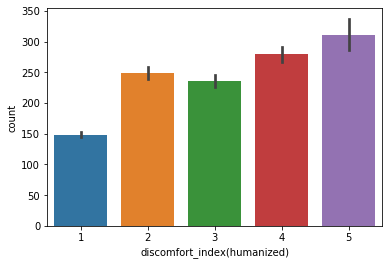

In [122]:
sns.barplot(data=train,x="discomfort_index(humanized)",y="count")

### 시각화결과

1. 오히려 불쾌지수가 높으면 대여량이 많았다.
2. 불쾌지수 쾌적한 경우 오히려 대여량이 낮았고 그렇지 않은경우에는 대여량이 많았다.

### 예측모델 향상법

1. 근무일에는 불쾌지수에 관계없이 대여를 많이 할 수 있다고 판단되기에 근무일과 휴일을 고려하여 재시각화를 해보는게 좋을 듯 하다.
2. 또한 불쾌지수는 날씨에 의한 영향도 있으므로 같이 고려하여 재시각화 후 분석해보자

### 재시각화

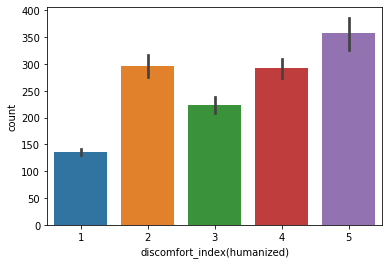

In [127]:
sns.barplot(data=train_restday, x = "discomfort_index(humanized)",y="count")

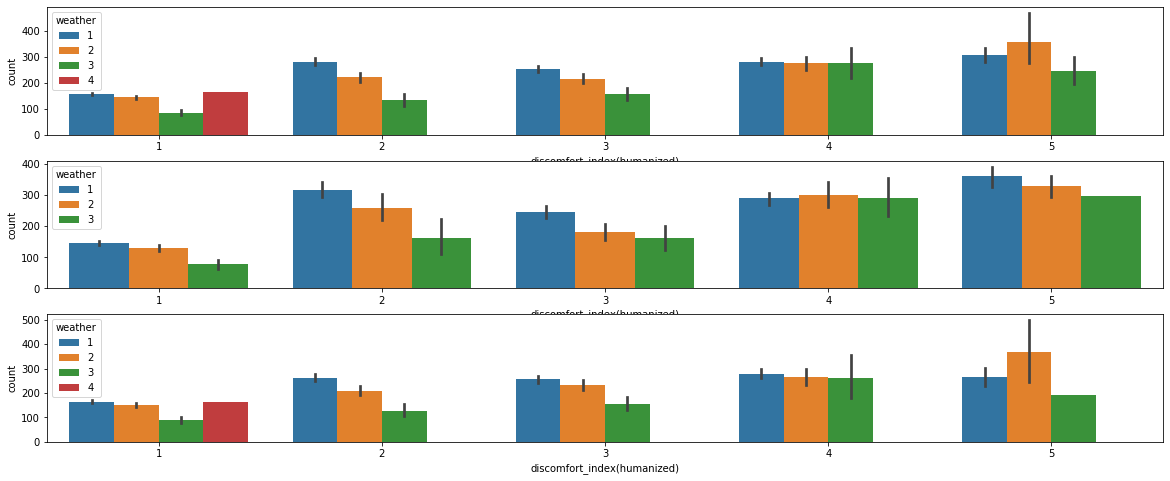

In [129]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,8)

sns.barplot(data=train, x = "discomfort_index(humanized)",y="count",hue="weather",ax=ax1)
sns.barplot(data=train_restday, x = "discomfort_index(humanized)",y="count",hue="weather",ax=ax2)
sns.barplot(data=train_working, x = "discomfort_index(humanized)",y="count",hue="weather",ax=ax3)

### 시각화결과

1. 근무일과 휴일은 큰 관련이 없다.
2. 불쾌지수가 4, 5인 경우는 날씨에 관계없이 대여량이 많았지만 그렇지 않은경우 날씨가 안좋으면 대여량이 줄어들었다.

### 예측 모델 향상법

불쾌지수구간이 4,5인 경우와 아닌 경우로 나누어 feature를 고려해주면 의미가 있다고 본다.
상식적으로는 아직 이해하지못하는데 불쾌지수 구간이 4인 경우는 특별한 다른 요인이 있는 것으로 보인다. 

### 회원, 비회원 분석

1. 회원의 대여량이 비회원의 대여량보다 훨씬 많을 것이라 예상
2. 회원의 경우 자전거 사용량이 많다고 생각할 수 있다.
3. 따라서 회원은 근무일에 많이 사용 비회원은 휴일에 많이 사용할 것이다.

### 시각화

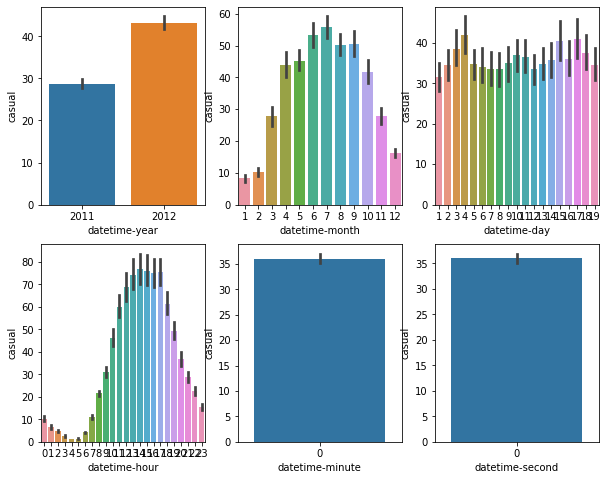

In [66]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(10,8)
sns.barplot(data=train, x="datetime-year", y="casual",ax=ax1)
sns.barplot(data=train, x="datetime-month", y="casual",ax=ax2)
sns.barplot(data=train, x="datetime-day", y="casual",ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="casual",ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="casual",ax=ax5)
sns.barplot(data=train, x="datetime-second", y="casual",ax=ax6)

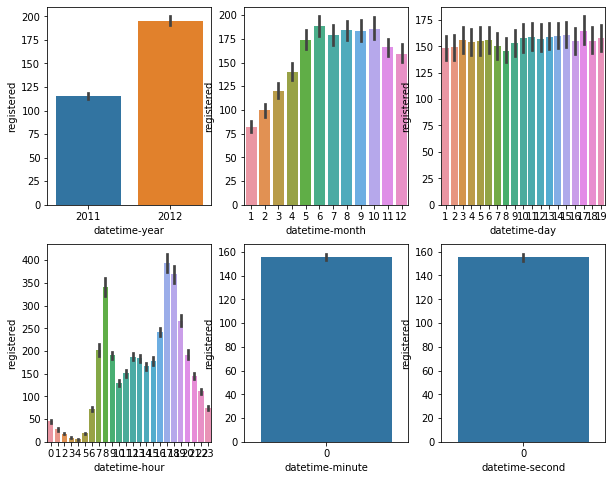

In [67]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(10,8)
sns.barplot(data=train, x="datetime-year", y="registered",ax=ax1)
sns.barplot(data=train, x="datetime-month", y="registered",ax=ax2)
sns.barplot(data=train, x="datetime-day", y="registered",ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="registered",ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="registered",ax=ax5)
sns.barplot(data=train, x="datetime-second", y="registered",ax=ax6)

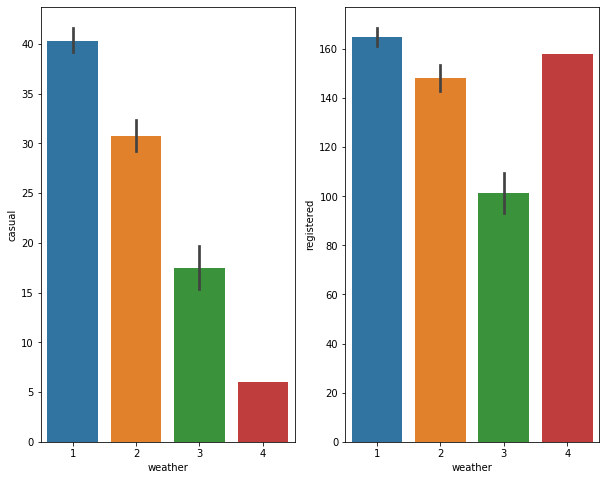

In [69]:
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(10,8)
sns.barplot(data=train,x="weather", y="casual",ax=ax1)
sns.barplot(data=train,x="weather", y="registered",ax=ax2)

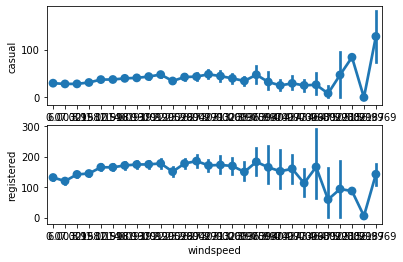

<Figure size 7200x576 with 0 Axes>

In [74]:
figure, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize=(100,8))

sns.pointplot(data=train,x="windspeed", y="casual",ax=ax1)
sns.pointplot(data=train,x="windspeed", y="registered",ax=ax2)

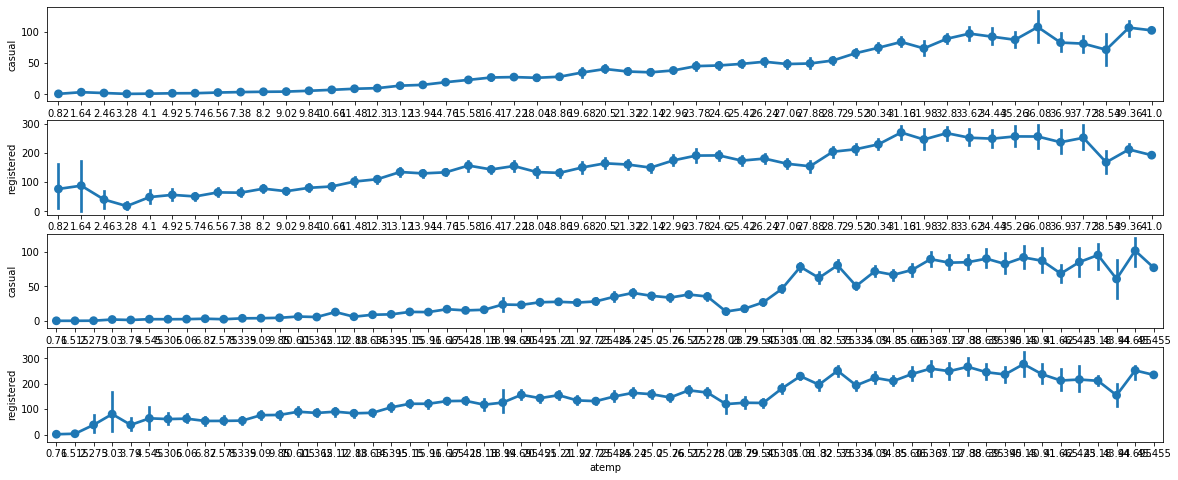

In [77]:
figure, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,8)

sns.pointplot(data=train,x="temp",y="casual",ax=ax1)
sns.pointplot(data=train,x="temp",y="registered",ax=ax2)
sns.pointplot(data=train,x="atemp",y="casual",ax=ax3)
sns.pointplot(data=train,x="atemp",y="registered",ax=ax4)

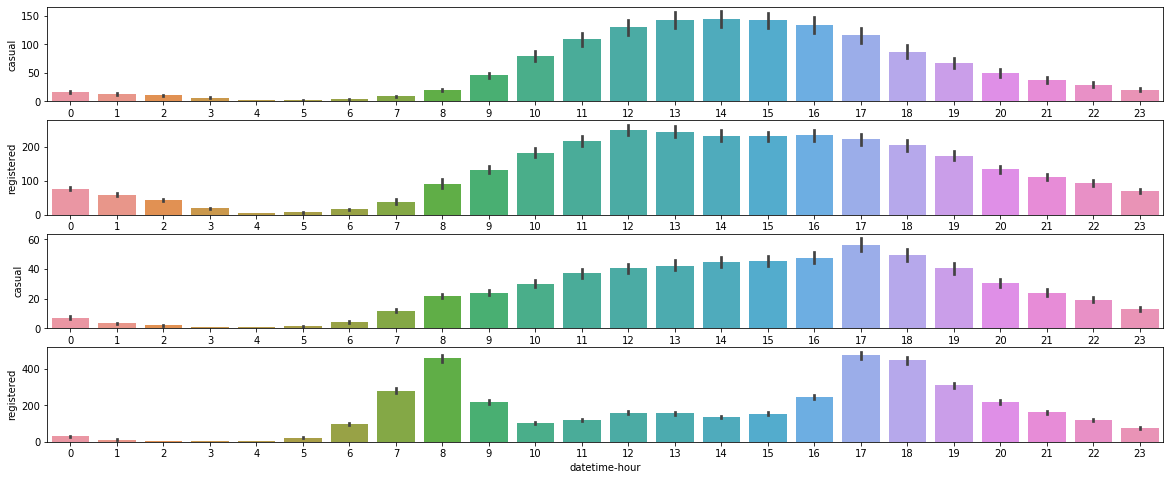

In [79]:
figure, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1)

figure.set_size_inches(20,8)

sns.barplot(data=train_restday, x="datetime-hour", y="casual", ax=ax1)
sns.barplot(data=train_restday, x="datetime-hour", y="registered", ax=ax2)
sns.barplot(data=train_working, x="datetime-hour", y="casual", ax=ax3)
sns.barplot(data=train_working, x="datetime-hour", y="registered", ax=ax4)

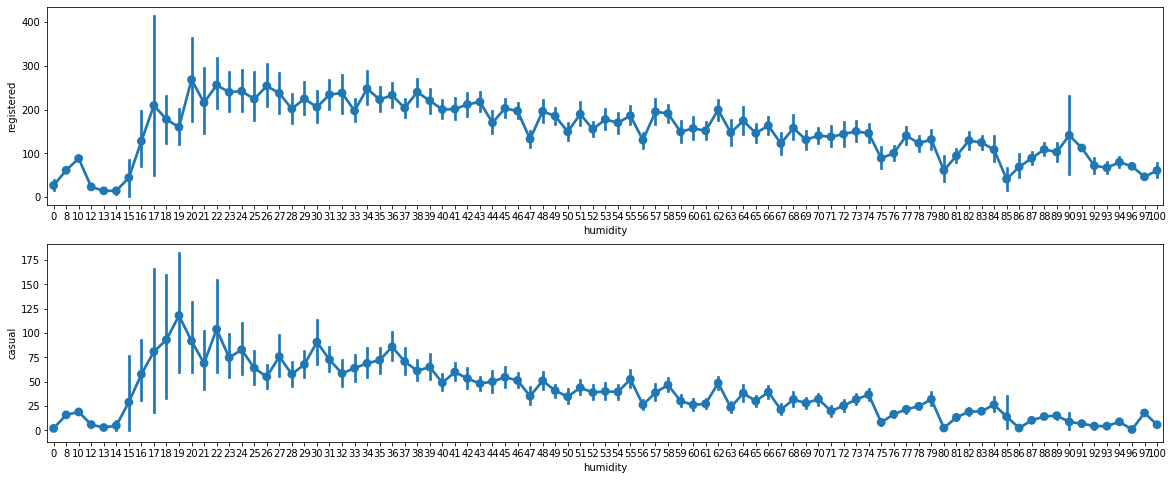

In [82]:
figure, (ax1,ax2)=plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,8)
sns.pointplot(data=train, x="humidity", y="registered",ax=ax1)
sns.pointplot(data=train, x="humidity", y="casual",ax=ax2)

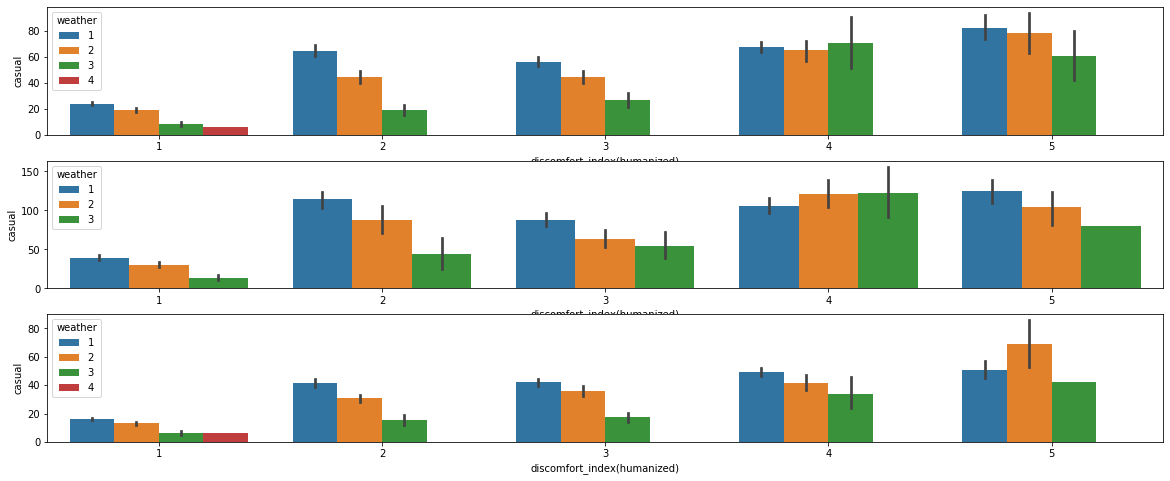

In [130]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,8)

sns.barplot(data=train, x = "discomfort_index(humanized)",y="casual",hue="weather",ax=ax1)
sns.barplot(data=train_restday, x = "discomfort_index(humanized)",y="casual",hue="weather",ax=ax2)
sns.barplot(data=train_working, x = "discomfort_index(humanized)",y="casual",hue="weather",ax=ax3)

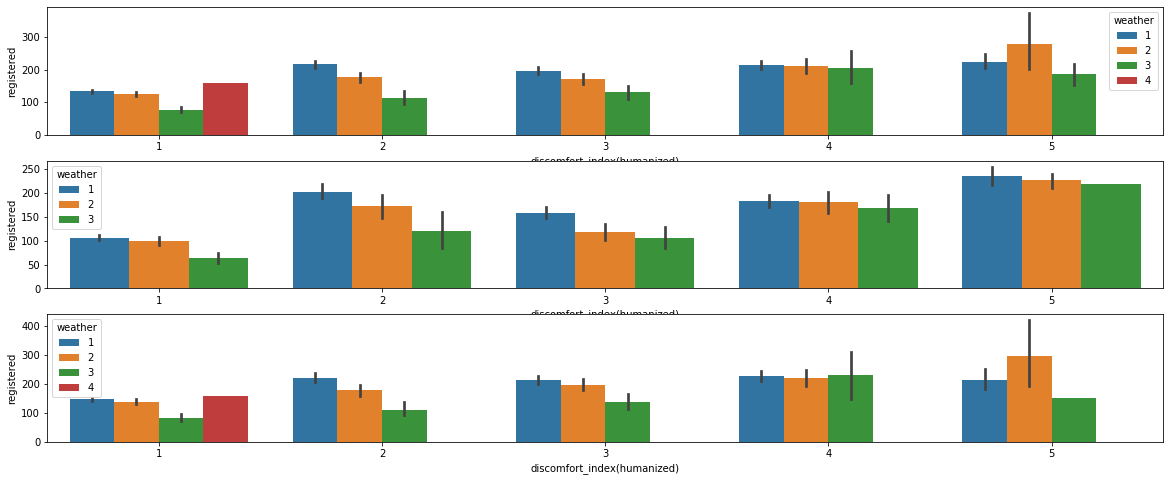

In [131]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,8)

sns.barplot(data=train, x = "discomfort_index(humanized)",y="registered",hue="weather",ax=ax1)
sns.barplot(data=train_restday, x = "discomfort_index(humanized)",y="registered",hue="weather",ax=ax2)
sns.barplot(data=train_working, x = "discomfort_index(humanized)",y="registered",hue="weather",ax=ax3)

## 수고 많으셨습니다!